In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../Lecture/KMeanClustering/College_Data.csv',index_col=0)

In [5]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
df['Private'] = df.apply(lambda x : 1 if x['Private'] == 'Yes' else 0, axis = 1)

In [17]:
df.corr()['Private'].sort_values()

F.Undergrad   -0.615561
Enroll        -0.567908
Accept        -0.475252
S.F.Ratio     -0.472205
P.Undergrad   -0.452088
Apps          -0.432095
Personal      -0.304485
PhD           -0.156714
Terminal      -0.129620
Books         -0.018549
Top25perc      0.095752
Top10perc      0.164132
Expend         0.258461
Grad.Rate      0.336162
Room.Board     0.340532
perc.alumni    0.414775
Outstate       0.552650
Private        1.000000
Name: Private, dtype: float64

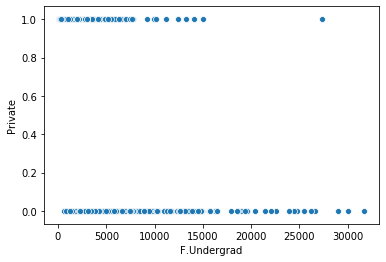

In [24]:
sns.scatterplot(x='F.Undergrad', y ='Private', data = df)

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

In [31]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Private'], kmeans.labels_))
print(classification_report(df['Private'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [37]:
from sklearn.model_selection import train_test_split

In [46]:
scaler.fit(df.drop('Private',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_data = scaler.transform(df.drop('Private', axis=1))

In [49]:
scaled_data = pd.DataFrame(scaled_data, columns=df.drop('Private',axis=1).columns)

In [52]:
scaled_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [53]:
X = scaled_data
y = df['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [56]:
X_train.shape

(466, 17)

In [58]:
model = Sequential()

model.add(Dense(17,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [59]:
model.fit(X_train,y_train,epochs=100, validation_data=(X_test, y_test))

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

15/15 [==============================] - 0s 18ms/step - loss: 0.7268 - val_loss: 0.6296
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7267 - val_loss: 0.5817
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6617 - val_loss: 0.5423
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6181 - val_loss: 0.5083
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5485 - val_loss: 0.4787
Epoch 6/100


Epoch 76/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2067 - val_loss: 0.1813
Epoch 77/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2163 - val_loss: 0.1813
Epoch 78/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1803 - val_loss: 0.1814
Epoch 79/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2083 - val_loss: 0.1816
Epoch 80/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2017 - val_loss: 0.1808
Epoch 81/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1924 - val_loss: 0.1807
Epoch 82/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1945 - val_loss: 0.1809
Epoch 83/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2047 - val_loss: 0.1815
Epoch 84/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2208 - val_loss: 0.1808
Epoch 85/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1923 - val_loss: 0.1806


In [60]:
loss = pd.DataFrame(model.history.history)

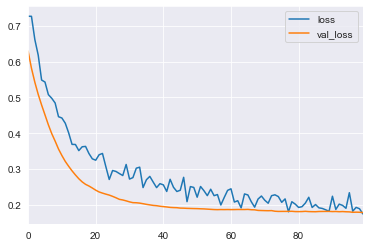

In [61]:
loss.plot()

In [65]:
predicts = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(confusion_matrix(y_test, predicts))
print(classification_report(y_test, predicts))

[[ 71   8]
 [ 12 220]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        79
           1       0.96      0.95      0.96       232

    accuracy                           0.94       311
   macro avg       0.91      0.92      0.92       311
weighted avg       0.94      0.94      0.94       311

